# BELL'S MEASURE IN CLASSICAL OPTICAL COHERENCE

## 0. Setting up this notebook
Kindly run the cell below to make sure you have all required dependencies

### 0.1 Installing and Importing Packages

In [115]:
from IPython.display import clear_output,display, Math, Latex
!pip install numpy
!pip install scipy
!pip install matplotlib
!pip install sympy
!pip install seaborn
!pip install qiskit
clear_output()
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets
from mpl_toolkits.mplot3d import axes3d
from sympy import *
from sympy.physics.quantum.dagger import Dagger
from IPython.display import Javascript
import seaborn as sns
import scipy as sc
import sys
from qiskit import *
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import matplotlib.pyplot as plotter
np.set_printoptions(threshold=sys.maxsize)
print("Successfully imported packages")

Successfully imported packages


#### 0.2 Defining Functions

In [116]:
def multiple_formatter(denominator=2, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter

class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))

In [117]:
def plotter(x,y,title,xlabel,ylabel,col,label):
    num_space,=x.shape
    plt.plot(x,y, color=col,linewidth=3, label=label)
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.xlim(0,2*np.pi)
    ax=plt.gca()
    ax.set_facecolor('#FFFFCC')
    ax.axhline(0, color='black', lw=2)
    ax.axvline(0, color='black', lw=2)
    ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
    plt.xticks(fontsize =15)
    plt.yticks(fontsize =15)
    return

In [118]:
def plotterC(x,y,title,xlabel,ylabel,col,label):
    num_space,=x.shape
    plt.plot(x,y, color=col,linewidth=3, label=label)
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.xlim(0,1)
    ax=plt.gca()
    ax.set_facecolor('#FFFFCC')
    ax.axhline(0, color='black', lw=2)
    ax.axvline(0, color='black', lw=2)
    plt.xticks(fontsize =15)
    plt.yticks(fontsize =15)
    return

In [119]:
def contourplotter(function,phi,title,xlabel,ylabel):
    f = lambdify((t,p,ta,pa),function, "numpy")
    ta_range = np.linspace(0,2*np.pi,1000);
    pa_range = np.linspace(0,2*np.pi,1000);
    phi_fixed = phi;
    X, Y = np.meshgrid(ta_range, pa_range);
    def ftemp(ta_val,pa_val):
        return f(0,phi_fixed,ta_val,pa_val);
    Z = ftemp(X,Y);
    fig, ax = plt.subplots(figsize=(7,5.7))
    cp = ax.contourf(X, Y, Z ,cmap='turbo');
    fig.colorbar(cp) # Add a colorbar to a plot
    plt.xlim(0,2*np.pi);
    plt.ylim(0,2*np.pi);
    ax.axis('equal');

    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    ax=plt.gca()
    ax.set_facecolor((0.8,1,1))
    ax.axhline(0, color='black', lw=2)
    ax.axvline(0, color='black', lw=2)
    ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
    ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
    plt.xticks(fontsize =15)
    plt.yticks(fontsize =15)
    return

In [120]:
def contourplotterC(function,P1,title,xlabel,ylabel):
    f = lambdify((P,ta,pa),function, "numpy")
    ta_range = np.linspace(0,2*np.pi,100);
    pa_range = np.linspace(0,2*np.pi,100);
    P_fixed = P1;
    X, Y = np.meshgrid(ta_range, pa_range);
    def ftemp(ta_val,pa_val):
        return f(P1,ta_val,pa_val);
    Z = ftemp(X,Y);
    fig, ax = plt.subplots(figsize=(7,5.7))
    cp = ax.contourf(X, Y, Z ,cmap='turbo');
    fig.colorbar(cp) # Add a colorbar to a plot
    plt.xlim(0,2*np.pi);
    plt.ylim(0,2*np.pi);
    ax.axis('equal');

    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    ax=plt.gca()
    ax.set_facecolor((0.8,1,1))
    ax.axhline(0, color='black', lw=2)
    ax.axvline(0, color='black', lw=2)
    ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
    ax.yaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
    ax.yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
    plt.xticks(fontsize =15)
    plt.yticks(fontsize =15)
    return

## Team details and work distrubution
1. Aneesh Bapat (Roll no.)

## Introduction
Essentially abstract and methods we have used for reproducing the results

## 1. Polarization & Spatial Parity

In the paper \[topic 2\] the experiments which were done were made using of an optical beam model with two binary degrees of freedom, them being polarization and spatial parity along the $x$ direction respectively of a quasi monochromatic source.<br>
For the spatial parity, in one dimension the beams are of form $E(x) = E_e\psi_e(x)+E_o\psi_o(x)$ where $\psi_e(x)$ is an even function and $\psi_o(x) = \text{sgn}(x)\psi_e(x)$ hence is an odd function. We give this beam a vector representation called $\mathbf{J}_\text{par} = [E_e\text{ } E_o]^T$. Spatial paritt is manipulated using a spatial light modulator (SLM) which we describe in the experimental apparatus section. Along with the horizontal (H) and vertical components of polarization taken into account we describe the polarization-parity jones vector as $\mathbf{J} = [E_\text{He}\text{ }E_\text{Ho}\text{ }E_\text{Ve}\text{ }E_\text{Vo}]^T$.<br>
We then describe the properties of this coherence using a $4\times4$ matrix which is $\mathbf{G} = \langle\mathbf{J}^{*}\mathbf{J}^\text{T}\rangle$. Taking partial trace along $\mathbf{G}$ would give us either $\mathbf{G}_\text{pol}$ or $\mathbf{G}_\text{par}$ on taking trace along parity or polarization respectively. We define a degree of polarization/parity using $D_{\text{pol}}$($D_\text{par}$) which quantifies the apparent coherence of each DoF when the other DoF is unresolved. Further an overall coherence $S$ is defined using the beam's linear entropy \[https://en.wikipedia.org/wiki/Linear_entropy\] as follows.
The definition of linear entropy comes from the motivation of von Neumann Entropy. For a quantum mechanical system with a density matrix $\rho$ this is defined as $S_v = \text{Tr}(-\rho\ln(\rho)) = -\langle\ln(\rho)\rangle$. The linear entropy $S_L$ is a lower approximation to $S_v$ which comes from expanding the leading term in the expansion of $\rho\ln\rho$ which becomes $\rho-\rho^2$ approximately when $\rho$ is close to $I$ (using taylor expansion) and taking trace this gives us the definition $S_L = \text{Tr}(\rho) - \text{Tr}(\rho^2)$ and by definition of the density matrix we have trace of $\rho$ equal to 1 which gives us $S_L = 1 - \text{Tr}(\rho^2)$. This is a non normalized quantity so this is normalized by multiplying it by $\frac{d}{d-1}$ which here is $4/3$ since our system has four dimensions. The definition of our $\mathbf{G}$ matrix is isomorphic to the definition of a density matrix of a two qubit system keeping the Jones vector $\mathbf{J}$ as the state of this two qubit system. Hence we have 
\begin{equation}\label{eq:1.1}\tag{1.1}S = 1-S_L = 1 - \frac{4}{3} + \frac{4}{3}\text{Tr}(\mathbf{G}^2) = \frac{4}{3}\left(\text{Tr}\{\mathbf{G}^2\}-\frac{1}{4}\right)\end{equation}
We know that for normalized states we have that $\frac{1}{d}\leq$ Tr$(\rho^2) \leq 1$ and equals one only for a pure state and $1/d$ for completely mixed state. We can similarly draw a parallel here to seeing that $S=1$ happens only for coherent (pure) states and is 0 when completely incoherent. An important note to make here is that applying a unitary matrix $U$ (so $U^{*}U^{T} = I$) which is not time dependent on the Jones vector would not change our value of $S$ since on acting of a unitary we would have $\mathbf{G}' = U^{*}\mathbf{G}U^{T}$ and so $\mathbf{G}'^2 = U^{*}\mathbf{G}^2U^{T}$ and this has same trace as $\mathbf{G}^2$ since trace is invariant under unitary transforms.

The paper here explores the properties of a beam where these two DoFs are infact coupled or entagled. One can start with a coherent linearly polarized beam at $45^\circ$ with even polarity which would be $\mathbf{J} = (1/\sqrt{2})[\text{1 0 1 0}]^T$ which can clearly be factored into a direct product of $\mathbf{J}_{\text{pol}}\otimes\mathbf{J}_\text{par}$ and so $D_\text{pol} = D_\text{par} = 1$. However on passing this beam through a polarization sensitive SLM which introduces a phase of $\varphi/2\sin(\varphi)$ only to the horizontal polarity component and none to the vertical. We can think of this analoguos to a controlled $R_x(\varphi)$ operation from the polarization qubit to parity qubit which acts when polarization is $|0\rangle$ (called H here for polarization). This puts the state to an entagled state $\mathbf{J} = (1/\sqrt{2})[\cos(\varphi/2)\text{ }\iota\sin(\varphi/2)\text{ 1 0}]^T$ which is no longer factorizable and shows that the apparant degree of coherence of the individual DoFs are no longer equal to 1 unless $\varphi=0$ and infact equal zero when $\varphi=\pi$. However we know that this state is still coherent on an overall, the only issue is that seeing the partial trace of $\mathbf{G}$ along the respective DoF provide an incomplete picture of the state hence leading to a conclusion that the coherence is absent. The paper proceeds to make use of the Bell's measure (see Appendix A) to quantify this entaglement which is the cause of this apparent coherence deficit.

## 2. Experimental Apparatus

For the experimental setup, we are using various separate components, which we will comment on one by one before seeing how they are arranged together for the experiment in this paper. We can develop a matrix operator formalism based on how these elements affect the vector $\mathbf{J} = [E_{He} \ E_{Ho} \ E_{Ve} \ E_{Vo}]$. Suppoe we have a device that modifies the Jones vector of a beam in the following way - $\mathbf{J_{new}} = \mathbf{A}\mathbf{J_{old}}$. Then, the corresponding $\mathbf{G} = \langle \mathbf{J^*J^T}\rangle$ tranforms as $\mathbf{G_{new} = A^*G_{old}A^T}$. This is because, assuming that the effect of the device, encoded in matrix $\mathbf{A}$  is time independent, the matrix can just move inside the time average. And as we will see below, for all the devices used in this experiment, their effect is time invariant.

## Polarisation only devices

### 2.1 Waveplates
<p>The first element we will look at is a half-wave plate. Suppose we have a half-wave plate whose axis is inclined at angle $\theta$ to the $+x$ axis. Then, it will add a phase of $\pi$ to the component of the amplitude along its axis, with respect to the component perpendicular to the axis. In other words, if the component of E field along the axis will be effectively multiplied by $e^{i\pi} = (-1)$.</p> 
<p> Suppose the in-going beam is described by a polarisation-only Jones vector $J_{pol} = [E_x \ E_y]^T$. Then the (complex) amplitude is $E_x\hat{x} + E_y\hat{y} = (E_{x}\cos\theta + E_y\sin\theta)\hat{\theta_{\parallel}} + (E_{x}\sin\theta - E_y\cos\theta) \hat{\theta_{\perp}}$. So after adding a phase multiplier factor of $e^{i\pi} = -1$ to the $\hat{\theta_{\parallel}}$ component, the new complex amplitude is $$(-E_{x}\cos\theta - E_y\sin\theta)\hat{\theta_{\parallel}} +  (E_{x}\sin\theta - E_y\cos\theta) \hat{\theta_{\perp}} = (\cos\theta \ (-E_{x}\cos\theta - E_y\sin\theta)+ \sin\theta(E_{x}\sin\theta - E_y\cos\theta))\hat{x} + (\sin\theta \ (-E_{x}\cos\theta - E_y\sin\theta)- \cos\theta(E_{x}\sin\theta - E_y\cos\theta))\hat{y} \\ = [E_x(\sin^2\theta-\cos^2\theta) - E_y(2\sin\theta\cos\theta) \qquad{} -E_x(2\sin\theta\cos\theta)  Ey(\cos^2\theta -\sin^2\theta)] \\ =[-E_x\cos(2\theta) - E_y\sin(2\theta) \qquad{} -E_x\sin(2\theta)+E_y\cos(2\theta)]$$
    
We can write this more compactly in a 2x2 matrix - 
$$\begin{pmatrix}-\cos(2\theta) & -\sin(2\theta) \\ -\sin(2\theta) & \cos(2\theta)\end{pmatrix}\begin{pmatrix}E_x \\ E_y\end{pmatrix}_{old} = \begin{pmatrix}E_x \\ E_y\end{pmatrix}_{new}$$
<p>When we are dealing with our 4 dimensional Jones vector, to generate the corresponding 4x4 HWP operator matrix, we\e can propose a 4x4 operator matrix. But before we spell it out, a few changes in notation are in order, to follow the same general notation as the paper. </p>
<ol>
    <li>The angle of rotation is denoted as $\frac{\theta}{2}$ instead of $\theta$ so that there is no ugly factor of             $2$ in the transformation matrix.</li>
    <li>The axis, with respect to which the angle $\frac{\theta}{2}$ is to be measured is not specified in the paper. Two reasonable guesses are either the X axis (upwards vertical, as shown in the figure) or the horizontal axis (-y axis in the figure). In either case, we get the same matrix except with a phase factor of $e^{i\pi} = -1$. But that does not change the intensity measurement, since we are only interested in the long time average and we are not using two different beams (so the phase is truly a global phase, and affects nothing at all). So this is a moot point for single beam operation. The exact phase also depends on what additional phase the plate adds to the slow axis, which we are not accounting for, anyway.
 
</ol>
Since our Jones vector is $J = J_{pol}\otimes J_{par}$, and our HWP does not affect the parity DOF at all (in other words, acts like an identity transformation), we can write it as a tensor product - 
$$A_{HWP}\left(\frac{\theta}{2}\right) = \begin{pmatrix}-\cos(\theta) & -\sin(\theta) \\ -\sin(\theta) & cos(\theta)\end{pmatrix}\otimes\begin{pmatrix} 1&0 \\ 0&1\end{pmatrix}=\begin{pmatrix}
-\cos\theta & 0 & -\sin\theta & 0 \\ 
0 &-\cos\theta&0&-\sin\theta \\
-\sin\theta &0 & \cos\theta & 0 \\
0 & -\sin\theta &0 & \cos\theta
\end{pmatrix} $$
To account for the global phase added, along the slow axis, we only need to multiply this matrix by a phase factor of $e^{i\phi}$ where $\phi$ is the slow axis phase added.

Sidenote: while the paper mentions that the angle is $\theta/2$ in it, that actually rotates by $\theta$ only and not by the expected $2\theta$ that would result from writing it in the form above since the text mentions that the basis is rotated by $\theta_a$ when the HWP of $\theta_a/2$ is applied.

### 2.2 Polarising Beam Splitter

This is an element that separates out the H and V polarised beams from the input beam. There is no operator matrix associated with it, it simply separates out the two beams, without affecting parity at all. One point to note here - as we describe below, a mirror will add a factor of (-1) to odd modes, so the component which gets reflected will pick up that factor here as well. We can either correct this with a second reflection of that beam from a $45^\circ$ mirror to correct it or not do anything at all about it (in the experimental setup in the paper seen as a whole, we can see that it won't matter the odd and even beams will be switched, but that is about it.)

## Parity Sensitive Devices

### 2.3 Dove Prism
<p> We know that a mirror inverts left-right. So if we put an odd beam through the mirror, it will pick up a factor of (-1) from the + and - axes being inverted (i.e. -x being mapped to x). </p>
<p> The operator (parity only, polarisation plays no role) associated to a mirror is $$\begin{pmatrix}-1 & 0 \\ 0 & 1\end{pmatrix}\begin{pmatrix}e \\ o \end{pmatrix}_{old} = \begin{pmatrix}e \\ o \end{pmatrix}_{new}$$ An additional -1 factor is added as a global phase, because of the phase change on reflecting.</p>
<img width="40%" src='Mirror_and_Parity.png'>
One thing about mirrors which is particularly inconvenient is that the incoming and outgoing beam does not travel in the same direction, so we cannot conveniently include a mirror in the arm of a Mach-Zehnder interferometer easily, for example. To make our life simple, we use a dove prism, which is a trapezoid shaped prism, that the light beam enters, undergoes TIR on one surface of it and exits travelling in the same direction as incoming beam. It performs the same matrix operation as a mirror, but is more convenient to use. One aspect to be careful of (that can be easily overcome) is that there is a phase change because the beam travels through the glass/ material of the prism, but that can be easily dealt with by using a compensator cell in the other arm. Aother important aspect of a Dove prism - since the wave incidence medium is denser and the transmission medium is rarer (unlike a regular mirror), there is no addition $\pi$ phase of reflection, and the operator matrix is simply $$\begin{pmatrix}1 & 0 \\ 0 & -1\end{pmatrix}\begin{pmatrix}e \\ o \end{pmatrix}_{old} = \begin{pmatrix}e \\ o \end{pmatrix}_{new}$$
<img width = "60%" src='Dove_prism.png'>

### 2.4 Mach Zehnder Interferometer
<img width = "60%" src='MZI.png'><center>A schematic of a MZI, self drawn</center>
<p> In this arrangement, the beam splitters are polarisation insensitive, so there is no polarisation discrimination. First let us consider a MZI with no dove prism (and no compensation cell). Suppose the only input beam is given from In1. Then, the left beam suffers two rarer-denser reflections and the same is the case with the right beam, as they come out from Out2. Hence, we have constructive interference at Out2. Whereas, as Out1, the left beam still has same phase (the reflection at exit beam splitter is denser-rarer, so no phase change) while the right beam has one reflection only, so the interference is destructive.</p>
<p>With a dove prism in place, the odd mode undergoes one extra inversion in the left path, so its constructive/destructive outputs are now exactly swapped. As a result, if we send in a superposition of odd and even modes into In1, the odd mode comes out from Out1, while the even mode comes out from Out2 (just as if no prism were there). Conversely, if we send in the beam from In2, the odd mode will come out from Out2 and the even mode from Out1.</p>

Hence we can think of two uses of this MZI arrangement - 
<ol> <li> To split a superposed beam into its odd and even components, send this beam in from one of the inputs only and the odd and even parity modes are separated.</li>
    <li> If we have a odd parity beam and an even parity beam, we can add them (make a superposed state) by sending in the odd beam in In1, the even beam from In2, and then getting the superposed beam out, from Out1.
       </ol>
       In the experiment performed in the paper, the authors concern themselves only with the first use.
       
### 2.5 SLMs and PS-SLMs
A SLM is a spatial light modulator. In general, this term refers to any device that modifies the beam in a space dependent fashion. In the context of this experiment, the SLM they use (Hamamatsu X10468-02) is an array of liquid crystal pixels, each of whose refractive index can be controlled independently by applying a voltage, in such a way, that we add a desired phase to the light passing through each pixel, and the phase in each pixel is independent of the others.
<p>Suppose we send a beam through a SLM which adds a $x$-dependant phase $\frac{\phi}{2}sgn(x)$ to the electric field (global phase does not matter here, by the way. Only relative phase/ difference in phase between top and bottom half being $\phi$ is what matters.) Then, we are effectively multiplying the old profile $E_{old}(x)$ by $e^{\iota\frac{\phi}{2}sgn(x)}$, to get new profile $E_{new}(x)$. Observe that $e^{\iota\frac{\phi}{2}sgn(x)} = cos(\frac{\phi}{2})+ \iota sgn(x)sin(\frac{\phi}{2})$. So, with $E_{old}(x) = e(x)+o(x)$, we can get $E_{new}(x) = (e(x)+o(x))(cos(\phi/2)+\iota sgn(x)sin(\phi/2)) = [cos(\phi/2)e(x) + \iota sin(\phi/2) sgn(x)o(x)] + [cos(\phi/2)o(x) + \iota sin(\phi/2) sgn(x)e(x)]$. </p>
<p>Observe that the first term in the new expression is even while the second term is odd, which means that they are the new even and odd decomposition (which is unique). We can re-express this as $\begin{pmatrix}cos(\phi/2) & \iota sin(\phi/2) \\ \iota sin(\phi/2) & cos(\phi/2) \end{pmatrix}\begin{pmatrix}e_{old} \\ o_{old}\end{pmatrix} = \begin{pmatrix}e_{new} \\ o_{new}\end{pmatrix}$ to make it look more like the transformation caused by a half wave plate, but for the parity DOF. In particular, observe that if we set $\phi = \pi$ then the matrix shown looks like a Pauli $\sigma_x$ matrix (times the constant $\iota$)- it swaps the $o$ and $e$ bases.

Further, to obtain the 4x4 transformation matrix, we again do a tensor product - 
$$A_{par}\left(\frac{\phi}{2}\right) = \begin{pmatrix}1 & 0 \\ 0 & 1\end{pmatrix}\otimes\begin{pmatrix} \cos(\phi/2)&i\sin(\phi/2) \\ i\sin(\phi/2) &\cos(\phi/2)\end{pmatrix}=\begin{pmatrix}
\cos(\phi/2)&i\sin(\phi/2) & 0& 0\\ i\sin(\phi/2) &\cos(\phi/2) &0 & 0\\
0&0&\cos(\phi/2)&i\sin(\phi/2) \\ 0&0&i\sin(\phi/2) &\cos(\phi/2)
\end{pmatrix} $$

Again, the rationale is that since there is no polarisation effect, that part of the first matrix is identity.

The liquid crystals can be acted on by a electric field in two directions, so that the refractive index of a single pixel itself is non-isotropic. This leads to polarisation-sensitive behaviour of the pixels. For example, if we take a SLM that adds a phase of $\frac{\phi}{2}sgn(x)$ only to the H-polarisation while leaving the V polarisation unchanged. In this case, we can simply modify the above operator matrix to look like $$A_{PS-SLM}\left(\frac{\phi}{2}\right) =\begin{pmatrix}
\cos(\phi/2)&i\sin(\phi/2) & 0& 0\\ i\sin(\phi/2) &\cos(\phi/2) &0 & 0\\
0&0&1&0 \\ 0&0&0 &1
\end{pmatrix} $$

### General Observations About the operator matrices
We can see the following properties about the matrix formalism we have developed.
<ol><li> The matrices are all unitary. $AA^\dagger = A^\dagger A = \mathbb{I}$. This is expected, because if we take a completely incoherent beam in phase as well as parity, then no device will be able to change it, and the $G$ matrix for a completely incoherent mode is a scalar multiple of identity.</li>
    <li> The matrices corresponding to a rotated HWP and to a polarisation-insensitive SLM commute. This is expected because each of these devices is expected to modify only one DOF.</li>
    </ol>

In [121]:
P,t,p,ta,pa = symbols('P theta varphi theta_a varphi_a',real=True)
A_HWP = Matrix([[-cos(ta/2),0,-sin(ta/2),0],[0,-cos(ta/2),0,-sin(ta/2)],[-sin(ta/2),0,cos(ta/2),0],
              [0,-sin(ta/2),0,cos(ta/2)]])
A_SLM = Matrix([[cos(pa/2),I*sin(pa/2),0,0],[I*sin(pa/2),cos(pa/2),0,0],[0,0,cos(pa/2),I*sin(pa/2)],
             [0,0,I*sin(pa/2),cos(pa/2)]])
A_PSSLM = Matrix([[cos(pa/2),I*sin(pa/2),0,0],[I*sin(pa/2),cos(pa/2),0,0],[0,0,1,0],
             [0,0,0,1]]) 

In [122]:
trigsimp(A_SLM*conjugate(A_SLM.T)) #A_SLM is unitary

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

In [123]:
trigsimp(A_PSSLM*conjugate(A_PSSLM.T)) #A_PSSLM is unitary

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

In [124]:
trigsimp(A_HWP*conjugate(A_HWP.T)) #A_HWP is unitary

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

In [125]:
trigsimp(A_HWP*A_SLM - A_SLM*A_HWP) #A_SLM and A_HWP commute

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

## Proposal for a Parity-Sensitive Polarisation Modifier
<p> In the main paper, one of the loose ends that the authors do not seem to have addressed is that polarity seems to have a special place in this qubits scheme, in the sense that controlled gates can be made only with polarity as a control qubit (no parity controlled gates/devices are proposed). Here, we wish to present the design of a parity controlled device, that can be used to implement the controlled version of any possible (ordinarily) parity-insensitive device. 
<p>The main idea is to use the second use of the MZI. Suppose you are given an input beam and you want to perform a controlled-HWP operation on that (we have already seen uncontrolled HWP earlier). Then, the idea is to split up the input beam into the odd and even components with an MZI and then recombine them with a second MZI. In this way, a parity-controlled operation can be performed. The below image shows a schematic for a parity-sensitive HWP.</p>
<img width = "40%" src='Parity_sensitive_HWP.png'>
<p> An important use of this idea will be to bring the line of thought presented in the paper to a logical conclusion - suppose we start with a purely even mode but completely unpolarised beam. Then, by coupling the parity to the polarisation, we can generate a coupled-DOF beam. To convert this beam to a completely polarised, parity-incoherent beam, we would need to implement a parity-controlled polarisation operation, which this section proposes a theoretical solution to accomplishing. One major issue still here, is that stacking two MZI's could be a challenge, in view of the difficulty of alignment.

## 3. Polarization and Spatial Parity analysis
### 3.1 The correlation function
<p>We will now proceed to define a normalized correlation function $C(\theta_a,\phi_a)$ which we will use for defining our bell's measure $B$. The analyzing done in the paper does so with the following experimental setup shown below (images taken from [topic2])</p>
<table>
    <tr>
        <td><img width="90%"src="fig1b-og.png"/><center><b>Fig: 3.1</b></center></td>
        <td><img width="90%"src="fig1c-og.png"/><center><b>Fig: 3.2</b></center></td>
    </tr>
</table>
Section 2. explains the functioning principle for each of the apparatus in the above figure. What the setup essentially does in fig: 3.1.1 is for analyzing the DoFs seperately. The polarization is analyzed in a linear basis rotated by $\theta_a$ by action of the half wave plate and similarly the parity is analyzed by analyzing over a basis rotated by $\varphi_a$. The measured intensities are normalized and kept as probabilities in a way that $P_H + P_V = P_o + P_e = 1$. In fig: 3.2 combined polarization-parity measurements are done by essentially using the setup of fig: 3.1 but by concatenating the different DoF analysis stages. If we call the input coherency matrix as $\mathbf{G}_{in}$ then the resulting coherency matrix after the transformations on which measurement is being done is 
\begin{equation}\label{eq:3.1}\tag{3.1}\mathbf{G}_{out} = A_{SLM}^*A_{HWP}^*\mathbf{G}_{in}A_{HWP}^TA_{SLM}^T\end{equation}
As already shown in section 1, our definition of overall coherence in eq: 1.1 is invariant under applying these unitaries on the state. The following is the definition we give to the correlation function in the equation below. Symmetric values are assignmed to the coefficeints $c_\text{pol} = \pm1$ ($c_\text{par} = \pm1$) to the dichotomic H (e) and V (o) probability outcomes. 
\begin{equation}\label{eq:3.2}\tag{3.2}C(\theta_a,\varphi_a) = \sum c_\text{pol}c_\text{par}P_\text{pol,par} = P_\text{He} - P_\text{H0} - P_\text{Ve} + P_\text{Vo}\end{equation}
For the uncoupled case this can be factorized into $C(\theta_1,\varphi_a) = C_\text{pol}(\theta_a)C_\text{par}(\phi_a)$ and here we would have $C_\text{pol}(\theta_a) = P_H - P_V$ and $C_\text{par} = P_e - P_o$. Proceeding this they use th CSHS formulation of the Bell's measure (see Appendix A) to write 
\begin{equation}\label{eq:3.3}\tag{3.3}B = |C(\theta_a,\varphi_a) + C(\theta_a,\varphi_a') + C(\theta_a',\varphi_a) - C(\theta_a',\varphi_a')|\end{equation}
Now we have an upper bound on $B_{max}$ which is the maximum value this measure takes over these four variables and this is what the paper from this point refers to as the Bell's measure. This bound is called the Tsirelon's bound and is $B_{max}\leq 2\sqrt{2}$ and in the classical case (where all observables commute) it is actually bounded above by 2.

We will now prove that any coherent beam has $D_\text{pol} = D_\text{par}$. Any coherent beam here would be isomorphic to a pure two qubit state. For pure states, if the state is $|\psi\rangle$, then the density matrix is $\rho = |\psi\rangle\langle\psi|$. We can represent this in a Schmidt form where $|\psi\rangle = \sum_ig_i|u_i\rangle\otimes|v_i\rangle$ which can be done for any arbitrary pure state so for the 4 dimensional Jones vector here we only have two variables and so without loss of generality we can choose to write our jones vector as $\mathbf{J} = [\mu_1\text{ 0 0 }\mu_2]^T$ and for this state we would have that
\begin{equation}\label{eq:3.4}\tag{3.4}\mathbf{G}_\text{pol} = \mathbf{G}_\text{par} = \begin{pmatrix}\mu_1^2 & 0\\0 & \mu_2^2\end{pmatrix}\end{equation}
This leads to $D_\text{pol} = D_\text{par} = |\mu_1^2-\mu_2^2|$ which is essentially the difference the eigenvalues of the respective matrix. Note that the above equation would be true in the basis where we can write the Schmidt decomposition of the Jones vector but since this is a coherent state this basis can be reached by applying unitaries that do not do any coupling. Also for coherent beams the paper claims that we would have $4D_\text{par}^2+B_{max}^2 = 4D_\text{pol}^2+B_{max}^2 = 8$ which becomes $4D_\text{pol}^2+B_{max}^2\leq 8$ and $4D_\text{par}^2+B_{max}^2\leq 8$ for partially coherent beams hence they define a new degree of coherence reffered to as the partial degree of coherence
\begin{equation}S_\text{pol} = \dfrac{D_\text{pol}^2}{2} + \left(\dfrac{B_{max}}{2\sqrt{2}}\right)^2\text{, }S_\text{par} = \dfrac{D_\text{par}^2}{2} + \left(\dfrac{B_{max}}{2\sqrt{2}}\right)^2\end{equation}
One important thing to note is that the accessible degrees of coherence written above are invariant under unitary coupling between the two DoFs. We can see this as a sort of sharing of coherence between apparent coherence of an individual DoF ($D_\text{pol}$ and $D_\text{par}$) and the coupling between them ($B_{max}$). For a fully coherent beam we will always have $S = S_\text{pol} = S_\text{par} = 1$ regardless of coupling between the DoFs. This also demostrates how we can make coherence essentially migrate from form of coupling to apparent coherence of individual DoFs by simply using unitary transforms.


## 4. Experimental results and derivations
The paper \[topic2\] describes three experiments A, B and C. Here we will derive the theoretical expressions they use for fitting their data using the SymPy package.

In [126]:
def trace_G(G): #A trace function for just 4x4 G matrices
    return simplify(G[0,0] + G[1,1] + G[2,2] + G[3,3])
def corr_prob(G): #Returns the value I_He - I_Ho - I_Ve +I_Vo from given G matrix
    return simplify(G[0,0] - G[1,1] - G[2,2] + G[3,3])

def par_tr_G_pol(G): #returns the partial trace of G for giving G_pol
    return simplify(Matrix([[G[0,0]+G[1,1],G[0,2]+G[1,3]],[G[2,0]+G[3,1],G[2,2]+G[3,3]]]))

def par_tr_G_par(G): #returns the partial trace of G for giving G_par
    return Matrix([[G[0,0]+G[2,2],G[0,1]+G[2,3]],[G[1,0]+G[3,2],G[1,1]+G[3,3]]])

def app_coh(G): #Returns apparent degree of coherence for a 2x2 G matrix
    return simplify(sqrt(1-4*simplify(Determinant(G))/(simplify(Trace(G))**2)))

def norm_grad(B,syms):
    c = 0
    for i in syms:
        c += simplify(B.diff(i)**2)
    return simplify(c)

#### Methods for Calculating Values of $D_{pol}$, $D_{par}$, $B_{max}$, $S_{pol}$ and $S_{par}$

In [127]:
def bmaxfinder(C_ta_pa,x):
    tb,pb = symbols('theta_b varphi_b',real=True)
    B = C_ta_pa + C_ta_pa.xreplace({ta:tb}) + C_ta_pa.xreplace({pa:pb}) - C_ta_pa.xreplace({ta:tb,pa:pb})
    b = lambdify((ta,pa,tb,pb,p),B, "numpy")
    bmax=[-1*(sc.optimize.minimize(lambda params: -1*abs(b(params[0],params[1],params[2],params[3],i)), [0,0,0,0], method = 'L-BFGS-B').fun) for i in x]
    bmax=np.around(bmax,decimals=5)
    return bmax

In [128]:
def bmaxfinderC(C_ta_pa,x):
    tb,pb = symbols('theta_b varphi_b',real=True)
    B = abs(C_ta_pa + C_ta_pa.xreplace({ta:tb}) + C_ta_pa.xreplace({pa:pb}) - C_ta_pa.xreplace({ta:tb,pa:pb}))
    b = lambdify((ta,pa,tb,pb,P),B, "numpy")
    bmax=[-1*(sc.optimize.minimize(lambda params: -1*abs(b(params[0],params[1],params[2],params[3],i)), [0,0,0,0], method = 'L-BFGS-B').fun) for i in x]
    bmax=np.around(bmax,decimals=5)
    return bmax

In [129]:
def dfinder(D,x):
    d=lambdify(p,D,"numpy")
    d_final=[d(i) for i in x]
    return d_final

In [130]:
def dfinderC(D,x):
    d=lambdify(P,D,"numpy")
    d_final=[d(i) for i in x]
    return d_final

In [131]:
def sfinder(d,bmax):   
    return np.around(np.square(d)/2+np.square(bmax)/8,decimals=5)

### 4.1 Experiment A
Here the field is competely coherent and we start with the Jones vector in state $\mathbf{J} = (1/\sqrt{2})[\cos(\varphi/2)\text{ }\iota\sin(\varphi/2)\text{ 1 0}]^T$ which is reached by applying the PS-SLM on the input state of $\mathbf{J}_{in} = (1/\sqrt{2})[\text{1 0 1 0}]^T$. On this we then apply the rotation of basis by $\theta_a$ for polarization and of $\varphi_a$ for parity and then conduct measurements of each component. Based on our previous definitions we now derive the correlation function for this experiment.

In [132]:
J = sqrt(1/2)*Matrix([cos(p/2),I*sin(p/2),1,0])
G_A = trigsimp(conjugate(J)*J.T)
G_A #The input beam G matrix before the transformations

Matrix([
[0.5*cos(varphi/2)**2,   0.25*I*sin(varphi),    0.5*cos(varphi/2), 0],
[ -0.25*I*sin(varphi), 0.5*sin(varphi/2)**2, -0.5*I*sin(varphi/2), 0],
[   0.5*cos(varphi/2),  0.5*I*sin(varphi/2),                  0.5, 0],
[                   0,                    0,                    0, 0]])

#### Calculation of $D_{pol}$ and $D_{par}$

In [133]:
G_pol_A = par_tr_G_pol(G_A)
G_pol_A

Matrix([
[              0.5, 0.5*cos(varphi/2)],
[0.5*cos(varphi/2),               0.5]])

In [134]:
G_par_A = par_tr_G_par(G_A)
G_par_A

Matrix([
[0.5*cos(varphi/2)**2 + 0.5,   0.25*I*sin(varphi)],
[       -0.25*I*sin(varphi), 0.5*sin(varphi/2)**2]])

In [135]:
D_pol_A=app_coh(G_pol_A)
D_pol_A# Prints D_pol

1.0*Abs(cos(varphi/2))

In [136]:
D_par_A=app_coh(G_par_A)
D_par_A# Prints D_par

0.707106781186547*sqrt(cos(varphi) + 1)

#### Calculation of the Correlation Function and $B_{max}$

In [137]:
G_out_A = conjugate(A_SLM)*conjugate(A_HWP)*G_A*A_HWP.T*A_SLM.T #Transformed matrix
C_ta_pa_A = trigsimp(corr_prob(G_out_A)/trace_G(G_out_A))
C_ta_pa_A

1.0*sin(theta_a)*cos(varphi/2 + varphi_a) - 0.5*cos(theta_a)*cos(varphi_a) + 0.5*cos(theta_a)*cos(varphi + varphi_a)

As we can see from above this does not actually match the expression provided in \[topic2\]. While this initially baffled us we came to a conclusion that this expression is infact correct as per the aim of the paper. Moreover this actually reproduces the experimental results they obtained while in contrast their correlation function fails to do it as well. Also the optimized Bmax values fit with the relation which the paper claims if our correlation function is used instead of theirs.
The optimization procedure that we chose to go ahead with is just normal numerical optimization since otherwise we would have had to make the gradient zero and run through all possible cases where the gradient vanishes which would have been a lengthy procedure.

#### GRAPHS FOR EXPERIMENT A

In [138]:
def expAPlots(option):
    num_space=102
    phi=np.linspace(0, 2*np.pi, num_space)
    bmax=bmaxfinder(C_ta_pa_A,phi)
    dpol=dfinder(D_pol_A,phi)
    dpar=dfinder(D_par_A,phi)
    spol=sfinder(dpol,bmax)
    spar=sfinder(dpar,bmax)
    d=dpol
    s=spol
    
    if option!='Hide All':        
    
        if option=='B':            
            fig, ax = plt.subplots(figsize=(7, 7))
            plotter(phi,bmax,r'$B_{max}$',r'$\phi$',r'$B_{max}$',(1,0,0),r'$B_{max}$')
            plt.plot(phi,[8**(0.5)]*num_space,color='black', linestyle ='dashed')
            plt.plot(phi,[2]*num_space,color='black', linestyle ='dashed')
            plt.figtext(s=r'$2\sqrt{2}$', x=0.15, y=0.77, fontsize=15)
            plt.figtext(s=r'$2$', x=0.15, y=0.48, fontsize=15)
            plt.ylim(1,3)
            plt.show()
            
        elif option=='S':
            fig, ax = plt.subplots(figsize=(7, 7))
            plotter(phi,spol,r'$S_{pol}=S_{par}=1$',r'$\phi$',r'$S_{pol}\ \slash\ S_{par}$',(1,0,0),r'$s_{pol}$')
            plotter(phi,spar,r'$S_{pol}=S_{par}=1$',r'$\phi$',r'$S_{pol}\ \slash\ S_{par}$',(0,0,1),r'$s_{par}$')
            plt.ylim(0,1.1) 
            plt.legend()
            plt.show()
            
        elif option=='D':         
            fig, ax = plt.subplots(figsize=(7, 7))
            plotter(phi,dpol,r'$D_{pol}\ and\ D_{par}$',r'$\phi$',r'$D_{pol}\ \slash\ D_{par}$',(1,0,0),r'$d_{pol}$')
            plotter(phi,dpar,r'$D_{pol}\ and\ D_{par}$',r'$\phi$',r'$D_{pol}\ \slash\ D_{par}$',(0,0,1),r'$d_{pol}$')
            plt.ylim(0,1.1)
            plt.legend()
            plt.show()
            
        else:
            fig, ax = plt.subplots(figsize=(7, 7))
            plotter(phi,dpol,r'$D_{pol}\ and\ D_{par}$',r'$\phi$',r'$D_{pol}\ \slash\ D_{par}$',(1,0,0),r'$d_{pol}$')
            plotter(phi,dpar,r'$D_{pol}\ and\ D_{par}$',r'$\phi$',r'$D_{pol}\ \slash\ D_{par}$',(0,0,1),r'$d_{pol}$')
            plt.ylim(0,1.1)
            plt.legend()
            plt.show()
            fig, ax = plt.subplots(figsize=(7, 7))
            plotter(phi,bmax,r'$B_{max}$',r'$\phi$',r'$B_{max}$',(1,0,0),r'$B_{max}$')
            plt.plot(phi,[8**(0.5)]*num_space,color='black', linestyle ='dashed')
            plt.plot(phi,[2]*num_space,color='black', linestyle ='dashed')
            plt.figtext(s=r'$2\sqrt{2}$', x=0.15, y=0.77, fontsize=15)
            plt.figtext(s=r'$2$', x=0.15, y=0.48, fontsize=15)
            plt.ylim(1,3)
            plt.show()
            fig, ax = plt.subplots(figsize=(7, 7))
            plotter(phi,spol,r'$S_{pol}=S_{par}=1$',r'$\phi$',r'$S_{pol}\ \slash\ S_{par}$',(1,0,0),r'$s_{pol}$')
            plotter(phi,spar,r'$S_{pol}=S_{par}=1$',r'$\phi$',r'$S_{pol}\ \slash\ S_{par}$',(0,0,1),r'$s_{par}$')
            plt.ylim(0,1.1) 
            plt.legend()
            plt.show()
            
            
        plt.show()
    
    else:       
        clear_output()
    return

interact(expAPlots, option=['Hide All', 'D', 'B', 'S', 'Show All']);

interactive(children=(Dropdown(description='option', options=('Hide All', 'D', 'B', 'S', 'Show All'), value='H…

In [139]:
def expAContours(phi):
    function=C_ta_pa_A
    contourplotter(function,phi,r'$C(\theta_a,\phi_a)$',r'$\theta_a$',r'$\phi_a$')
    return
interact(expAContours, phi=widgets.FloatSlider(min=0, max=2*np.pi, step=0.02, value=np.pi/3, continuous_update=False, layout=Layout(width='600px')));

interactive(children=(FloatSlider(value=1.0471975511965976, continuous_update=False, description='phi', layout…

As it can be seen in the above graphs, our degree of coherence $S$ and also $S_\text{pol}$ and $S_\text{par}$ stay at the value of 1 throughout and are invariant to any unitary transformation done on the system. As we vary the angle $\phi$ we can see that the coupling is maximized at $\phi=\pi$ at which moment the apparent degrees of coherence go to zero since all of our original coherency is present in the form of coupling.

### 4.2 Experiment B
Here starting with the same $\mathbf{J}_{in}$ the polarization is scrambled using a variable polarization rotator which does not affect the spatial DoF so we have $D_\text{pol} = 0$ and $D_\text{par} = 1$. Now this beam is sent through a PS-SLM which would couple the DoFs. We now go on to derive the correlation function for this

In [140]:
G_B = (1/2)*Matrix([[cos(p/2)**2, I*cos(p/2)*sin(p/2), 0, 0],[-I*cos(p/2)*sin(p/2), sin(p/2)**2, 0,0],
            [0,0,1,0],[0,0,0,0]])
G_B #The input beam G matrix before the transformations

Matrix([
[              0.5*cos(varphi/2)**2, 0.5*I*sin(varphi/2)*cos(varphi/2),   0, 0],
[-0.5*I*sin(varphi/2)*cos(varphi/2),              0.5*sin(varphi/2)**2,   0, 0],
[                                 0,                                 0, 0.5, 0],
[                                 0,                                 0,   0, 0]])

#### Calculation of $D_{pol}$ and $D_{par}$

In [141]:
G_pol_B = par_tr_G_pol(G_B)
G_pol_B

Matrix([
[0.5,   0],
[  0, 0.5]])

In [142]:
G_par_B = par_tr_G_par(G_B)
G_par_B

Matrix([
[        0.5*cos(varphi/2)**2 + 0.5, 0.5*I*sin(varphi/2)*cos(varphi/2)],
[-0.5*I*sin(varphi/2)*cos(varphi/2),              0.5*sin(varphi/2)**2]])

In [143]:
D_pol_B=app_coh(G_pol_B)
D_pol_B# Prints D_pol

0

In [144]:
D_par_B=app_coh(G_par_B)
D_par_B

0.707106781186548*sqrt(cos(varphi) + 1)

#### Calculation of the Correlation Function and $B_{max}$

In [145]:
G_out_B = conjugate(A_SLM)*conjugate(A_HWP)*G_B*A_HWP.T*A_SLM.T #Transformed matrix
C_ta_pa_B = trigsimp(corr_prob(G_out_B)/trace_G(G_out_B))
C_ta_pa_B

0.5*(-cos(varphi_a) + cos(varphi + varphi_a))*cos(theta_a)

We have now seen that our expression for the correlation function matches the exact one obtained in the reference \[topic2\]. We now go ahead to optimize our expression for B and obtain the other plots below. On a sidenote one can actually traditionally find the maxima for the $B$ expression here since it is simpler to look at. The condition where it is maximized is when $\phi_a=\phi_b=(\pi-\phi)/2$ and $\theta_a = \theta_b = 0$ or $\pi$ which can be verified by looking at the gradient.

#### GRAPHS FOR EXPERIMENT B

In [146]:
def expBPlots(option):
    num_space=102
    phi=np.linspace(0, 2*np.pi, num_space)
    bmax=bmaxfinder(C_ta_pa_B,phi)
    dpol=dfinder(D_pol_B,phi)
    dpar=dfinder(D_par_B,phi)
    spol=sfinder(dpol,bmax)
    spar=sfinder(dpar,bmax)
    
    if option!='Hide All':        
    
        if option=='B':            
            fig, ax = plt.subplots(figsize=(7, 7))
            plotter(phi,bmax,r'$B_{max}$',r'$\phi$',r'$B_{max}$',(1,0,0),r'$B_{max}$')
            plt.plot(phi,[2]*num_space,color='black', linestyle ='dashed')
            plt.ylim(0,2.5)
            plt.show()
            
        elif option=='S':
            fig, ax = plt.subplots(figsize=(7, 7))
            plotter(phi,spol,r'$S_{pol}=S_{par}=1$',r'$\phi$',r'$S_{pol}\ \slash\ S_{par}$',(1,0,0),r'$s_{pol}$')
            plotter(phi,spar,r'$S_{pol}=S_{par}=1$',r'$\phi$',r'$S_{pol}\ \slash\ S_{par}$',(0,0,1),r'$s_{par}$')
            plt.ylim(0,1.1) 
            plt.legend()
            plt.show()
            
        elif option=='D':         
            fig, ax = plt.subplots(figsize=(7, 7))
            plotter(phi,dpol,r'$D_{pol}\ and\ D_{par}$',r'$\phi$',r'$D_{pol}\ \slash\ D_{par}$',(1,0,0),r'$d_{pol}$')
            plotter(phi,dpar,r'$D_{pol}\ and\ D_{par}$',r'$\phi$',r'$D_{pol}\ \slash\ D_{par}$',(0,0,1),r'$d_{pol}$')
            plt.ylim(-0.1,1.1)
            plt.legend()
            plt.show()
            
        else:
            fig, ax = plt.subplots(figsize=(7, 7))
            plotter(phi,dpol,r'$D_{pol}\ and\ D_{par}$',r'$\phi$',r'$D_{pol}\ \slash\ D_{par}$',(1,0,0),r'$d_{pol}$')
            plotter(phi,dpar,r'$D_{pol}\ and\ D_{par}$',r'$\phi$',r'$D_{pol}\ \slash\ D_{par}$',(0,0,1),r'$d_{pol}$')
            plt.ylim(-0.1,1.1)
            plt.legend()
            plt.show()
            fig, ax = plt.subplots(figsize=(7, 7))
            plotter(phi,bmax,r'$B_{max}$',r'$\phi$',r'$B_{max}$',(1,0,0),r'$B_{max}$')
            plt.plot(phi,[2]*num_space,color='black', linestyle ='dashed')
            plt.ylim(0,2.5)
            plt.show()
            fig, ax = plt.subplots(figsize=(7, 7))
            plotter(phi,spol,r'$S_{pol}=S_{par}=1$',r'$\phi$',r'$S_{pol}\ \slash\ S_{par}$',(1,0,0),r'$s_{pol}$')
            plotter(phi,spar,r'$S_{pol}=S_{par}=1$',r'$\phi$',r'$S_{pol}\ \slash\ S_{par}$',(0,0,1),r'$s_{par}$')
            plt.ylim(0,1.1) 
            plt.legend()
            plt.show()
            
            
        plt.show()
    
    else:       
        clear_output()
    return

interact(expBPlots, option=['Hide All', 'D', 'B', 'S', 'Show All']);

interactive(children=(Dropdown(description='option', options=('Hide All', 'D', 'B', 'S', 'Show All'), value='H…

In [147]:
def expBContours(phi):
    function=C_ta_pa_B
    contourplotter(function,phi,r'$C(\theta_a,\phi_a)$',r'$\theta_a$',r'$\phi_a$')
    return
interact(expBContours, phi=widgets.FloatSlider(min=0, max=2*np.pi, step=0.02, value=np.pi/3, continuous_update=False, layout=Layout(width='600px')));

interactive(children=(FloatSlider(value=1.0471975511965976, continuous_update=False, description='phi', layout…

### 4.3 Experiment C
In this experiment we again start with the same $\mathbf{J}_{in}$ and an interaction is considered that makes it have a random coupling. It has a probability $P$ to couple polarization and parity and $1-P$ to not achieved by randomly toggling between two phase distributions of the PS-SLM, one with $\pi/2\text{sgn}(x)$ phase and another with zero phase where $P$ is the fraction of time that the PS-SLM displays the first phase pattern. From this we go on to derive it's correlation function.

In [148]:
J_ent = (1/sqrt(2))*Matrix([0, I, 1, 0])#Entagled state
J_in = (1/sqrt(2))*Matrix([1, 0, 1, 0])#Input state
G_C = P*conjugate(J_ent)*J_ent.T + (1-P)*conjugate(J_in)*J_in.T
G_C

Matrix([
[1/2 - P/2,     0, 1/2 - P/2, 0],
[        0,   P/2,    -I*P/2, 0],
[1/2 - P/2, I*P/2,       1/2, 0],
[        0,     0,         0, 0]])

#### Calculation of $D_{pol}$ and $D_{par}$

In [149]:
G_pol_C = par_tr_G_pol(G_C)
G_pol_C

Matrix([
[      1/2, 1/2 - P/2],
[1/2 - P/2,       1/2]])

In [150]:
G_par_C = par_tr_G_par(G_C)
G_par_C

Matrix([
[1 - P/2,   0],
[      0, P/2]])

In [151]:
D_pol_C=app_coh(G_pol_C)
simplify(D_pol_C)# Prints D_pol

sqrt(P**2 - 2*P + 1)

In [152]:
D_par_C=app_coh(G_par_C)
D_par_C

sqrt(P**2 - 2*P + 1)

#### Calculation of the Correlation Function and $B_{max}$

In [153]:
G_out_C = conjugate(A_SLM)*conjugate(A_HWP)*G_C*A_HWP.T*A_SLM.T #Transformed matrix
C_ta_pa_C = trigsimp(corr_prob(G_out_C)/trace_G(G_out_C))
C_ta_pa_C

-sqrt(2)*P*sin(theta_a)*sin(varphi_a + pi/4) - P*cos(theta_a)*cos(varphi_a) + sin(theta_a)*cos(varphi_a)

In [154]:
simplify(C_ta_pa_C - ((1-P)*sin(ta)*cos(pa) - P*cos(ta-pa)))

0

As we have shown in the cell above the correlation function we have derived matches exactly with the function that the paper provides. We again use numerical methods to maximize this function since optimizing by minimization of gradient would take considerably long to do. Our results shown below match up consistently with those shown in \[topic2\].

#### GRAPHS FOR EXPERIMENT C

In [155]:
def expCPlots(option):
    num_space=102
    P=np.linspace(0, 1, num_space)
    bmax=bmaxfinderC(C_ta_pa_C,P)
    dpol=dfinderC(D_pol_C,P)
    dpar=dfinderC(D_par_C,P)
    spol=sfinder(dpol,bmax)
    spar=sfinder(dpar,bmax)
    
    if option!='Hide All':        
    
        if option=='B':            
            fig, ax = plt.subplots(figsize=(7, 7))
            plotterC(P,bmax,r'$B_{max}$',r'$\phi$',r'$B_{max}$',(1,0,0),r'$B_{max}$')
            plt.plot(P,[2]*num_space,color='black', linestyle ='dashed')
            plt.ylim(1,3)
            plt.show()
            
        elif option=='S':
            fig, ax = plt.subplots(figsize=(7, 7))
            plotterC(P,spol,r'$S_{pol}=S_{par}=1$',r'$\phi$',r'$S_{pol}\ \slash\ S_{par}$',(1,0,0),r'$s_{pol}$')
            plotterC(P,spar,r'$S_{pol}=S_{par}=1$',r'$\phi$',r'$S_{pol}\ \slash\ S_{par}$',(0,0,1),r'$s_{par}$')
            plt.ylim(0,1.1) 
            plt.legend()
            plt.show()
            
        elif option=='D':         
            fig, ax = plt.subplots(figsize=(7, 7))
            plotterC(P,dpol,r'$D_{pol}\ and\ D_{par}$',r'$\phi$',r'$D_{pol}\ \slash\ D_{par}$',(1,0,0),r'$d_{pol}$')
            plotterC(P,dpar,r'$D_{pol}\ and\ D_{par}$',r'$\phi$',r'$D_{pol}\ \slash\ D_{par}$',(0,0,1),r'$d_{pol}$')
            plt.ylim(-0.1,1.1)
            plt.legend()
            plt.show()
            
        else:
            fig, ax = plt.subplots(figsize=(7, 7))
            plotterC(P,dpol,r'$D_{pol}\ and\ D_{par}$',r'$\phi$',r'$D_{pol}\ \slash\ D_{par}$',(1,0,0),r'$d_{pol}$')
            plotterC(P,dpar,r'$D_{pol}\ and\ D_{par}$',r'$\phi$',r'$D_{pol}\ \slash\ D_{par}$',(0,0,1),r'$d_{pol}$')
            plt.ylim(-0.1,1.1)
            plt.legend()
            plt.show()
            fig, ax = plt.subplots(figsize=(7, 7))
            plotterC(P,bmax,r'$B_{max}$',r'$\phi$',r'$B_{max}$',(1,0,0),r'$B_{max}$')
            plt.plot(P,[2]*num_space,color='black', linestyle ='dashed')
            plt.ylim(1,3)
            plt.show()
            fig, ax = plt.subplots(figsize=(7, 7))
            plotterC(P,spol,r'$S_{pol}=S_{par}=1$',r'$\phi$',r'$S_{pol}\ \slash\ S_{par}$',(1,0,0),r'$s_{pol}$')
            plotterC(P,spar,r'$S_{pol}=S_{par}=1$',r'$\phi$',r'$S_{pol}\ \slash\ S_{par}$',(0,0,1),r'$s_{par}$')
            plt.ylim(0,1.1) 
            plt.legend()
            plt.show()
            
            
        plt.show()
    
    else:       
        clear_output()
    return

interact(expCPlots, option=['Hide All', 'D', 'B', 'S', 'Show All']);

interactive(children=(Dropdown(description='option', options=('Hide All', 'D', 'B', 'S', 'Show All'), value='H…

In [156]:
def expCContours(P):
    function=C_ta_pa_C
    contourplotterC(function,P,r'$C(\theta_a,\phi_a)$',r'$\theta_a$',r'$\phi_a$')
    return
interact(expCContours, P=widgets.FloatSlider(min=0, max=1, step=0.01, value=1/3, continuous_update=False, layout=Layout(width='600px')));

interactive(children=(FloatSlider(value=0.3333333333333333, continuous_update=False, description='P', layout=L…

## 5. Reduced representation of the two Binary DoFs
Write something here

In [157]:
def randG():
    G=np.zeros([4,4])
    G[0,0]=np.random.uniform(0,1)
    G[1,1]=np.random.uniform(0,1-np.trace(G))
    G[2,2]=np.random.uniform(0,1-np.trace(G))
    G[3,3]=1-np.trace(G)
    #G=G/np.trace(G)
    A = np.random.rand(4,4)*2-ones(4,4)+1j*np.random.rand(4,4)*2-ones(4,4)
    U,_=np.linalg.qr(np.random.rand(4,4)+1j*np.random.rand(4,4))
    G=(U@G@np.conjugate(np.transpose(U))).round(4)
    return G

In [158]:
def C_ta_pa(G,t1,p1):
    a_hwp_1 = [[-np.cos(t1/2),0,-np.sin(t1/2),0],[0,-np.cos(t1/2),0,-np.sin(t1/2)],[-np.sin(t1/2),0,np.cos(t1/2),0],[0,-np.sin(t1/2),0,np.cos(t1/2)]]
    a_slm_1 = [[np.cos(p1/2),1j*np.sin(p1/2),0,0],[1j*np.sin(p1/2),np.cos(p1/2),0,0],[0,0,np.cos(p1/2),1j*np.sin(p1/2)],[0,0,1j*np.sin(p1/2),np.cos(p1/2)]]
    G_out=np.conjugate(a_slm_1)*np.conjugate(a_hwp_1)*G*np.conjugate(a_hwp_1)*np.conjugate(a_slm_1)
    return np.real((G_out[0,0]-G_out[1,1]-G_out[2,2]+G_out[3,3])/(np.trace(G))).round(8)

In [159]:
def B(G,t1,t2,p1,p2):
    return abs(C_ta_pa(G,t1,p1)+C_ta_pa(G,t1,p2)+C_ta_pa(G,t2,p1)-C_ta_pa(G,t2,p2))

In [160]:
def genS(G):
    G_pol = [[G[0,0]+G[1,1],G[0,2]+G[1,3]],[G[2,0]+G[3,1],G[2,2]+G[3,3]]]
    G_par = [[G[0,0]+G[2,2],G[0,1]+G[2,3]],[G[1,0]+G[3,2],G[1,1]+G[3,3]]]
    
    D_pol=sqrt(1-4*(np.linalg.det(G_pol))/((np.trace(G_pol))**2))
    D_par=sqrt(1-4*(np.linalg.det(G_par))/((np.trace(G_par))**2))
    
    bmax=-1*(sc.optimize.minimize(lambda params: -1*abs(B(G,params[0],params[1],params[2],params[3])), [0,0,0,0], method = 'Nelder-Mead').fun)
    spol=round(np.real(complex(D_pol**2/2+bmax**2/8)),8)
    spar=round(np.real(complex(D_par**2/2+bmax**2/8)),8)
    s=round(np.real((4/3)*(np.trace(G@G)-(1/4))),8)
    return spol,spar,s

In [161]:
n=100000
x=np.zeros(n)
y=np.zeros(n)
z=np.zeros(n)
for i in range(n):
    #print(i)
    x[i],y[i],z[i]=genS(randG())
rows = zip(x,y,z)
import csv

with open('data.csv', mode='w', newline='') as f:
    writer = csv.writer(f)
    for row in rows:
        writer.writerow(row)

<IPython.core.display.Javascript object>


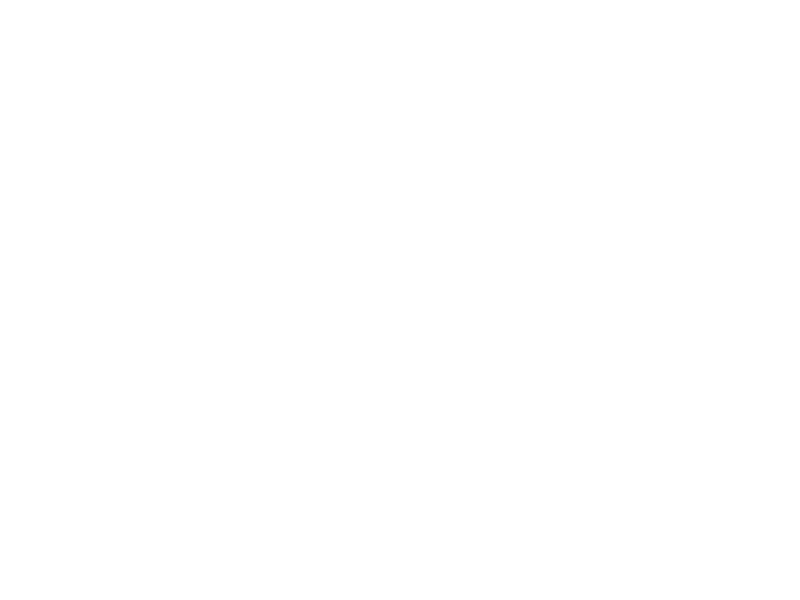

In [162]:

def Plot3dim(x,y,z):
    
    fig = plt.figure()
    
    ax = plt.axes(projection='3d')
    ax.scatter3D(x, y, z, color=(1,0,0))
    ax.axes.set_xlim3d(left=0, right=1) 
    ax.axes.set_ylim3d(bottom=0, top=1) 
    ax.axes.set_zlim3d(bottom=0, top=1)
    ax.grid(False)
    ax.set_title("PLOT OF ALLOWED ENTROPIES")
    ax.set_xlabel(r"$S_{pol}$")
    ax.set_ylabel(r"$S_{par}$")
    ax.set_zlabel(r"$S$")
%matplotlib notebook
Plot3dim(x,y,z)

## 6. Quantum Circuits
As one may have already noticed, the behavior of the system here can be accurately modelled using quantum systems where instead of coherence one measures the purity of a state. We make use of the IBM Qiskit libraries to build these experimental setups into their equivalent quantum circuits making use of ancillary qubits to create inherently mixed states. The main idea here is that for experiment A we would only need the two qubits each representing one DoF to model this system and reproduce the results using the appropriate operators.
### Interpretation of the model
<p>The first qubit (indexed by 0) refers to the polarisation DOF and the second qubit (index 1) refers to the parity DOF. We will take the $|1\rangle$ state of polarity to mean pure V-polarisation and $|0\rangle$ state to mean pure H-polarisation. Similarly, we take the $|0\rangle$ and $|1\rangle$ states of the parity qubit to mean purely even and purely odd mode, respectively.</p>
<table>
    <tr><td>Parity-polarisation state</td><td>Qubit configuration</td></tr>
    <tr><td>He</td><td>00</td></tr>
    <tr><td>Ho</td><td>01</td></tr>
    <tr><td>Ve</td><td>10</td></tr>
    <tr><td>Vo</td><td>11</td></tr>
</table>
<p>Further, we will always use any ancilla qubits we need, to replicate the probabilistic devices (like random rotator or probabilistic PS-SLM) to be the initial qubits, the second last qubit will represent polarisation, and the last qubit represents parity.</p>

For experiment B one of our state is starting in an impure form, something which cannot be reached if one were to only apply unitary transformations. Here we make use of an ancillary qubit which is coupled with the rest of the two qubits and hence is in a way storing the coherence we wished to get rid off as part of it's coupling. The main idea of this paper was that partial trace matrices do not give us the complete picture of the system which we can demonstrate very simply just by using a bell state (a pure state) and noting that it's partial traces are actually representative of impure states.

The purpose of this section is to demonstrate a simulation which is based in quantum mechanics which reproduces the results of classical coherence obtained in this paper.

A small point to add is that in qiskit the representation is not with zeroth qubit being MSB and last qubit being LSB but the other way round. In experiment A for example $q_0$ is the polarization qubit and $q_1$ is the parity qubit and so Ho is actually 10 and Ve is 01 and so on.

In [163]:
#Defining the operations on the circuit
simulator = Aer.get_backend('statevector_simulator') #Using statevector simulator

def SLM(phi,qc,ancilla_used = 0):
    qc.rx(-phi,ancilla_used+1)
    return
#For HWP, by observing the 2x2 matrix, we see that the operator looks like Ry(theta)*sigma_Z 
def HWP(theta,qc,ancilla_used = 0):
    qc.z(ancilla_used)
    qc.ry(theta,ancilla_used)
    return

#for PS-SLM, we want the H-polarisation to induce an SLM action, but not V. So, if polarisation qubit is 0 (H), we want the
#controlled gate to fire. So we first invert (NOT or X gate) the control bit, use a usual controlled gate, then invert it 
#again.
def PSSLM(phi,qc,ancilla_used=0):
    qc.x(ancilla_used)
    qc.crx(-phi,ancilla_used,ancilla_used+1) #angle,control,target
    qc.x(ancilla_used)
    return

def corr_circ(qc):
    result = execute(qc, simulator).result()
    statevector = result.get_statevector(qc)
    corr = 0
    if len(statevector) == 4:
        corr = 2*(np.absolute(statevector[0]**2) + np.absolute(statevector[3]**2)) - 1
    if len(statevector) == 8:
        corr = (np.absolute(statevector[0]**2) + np.absolute(statevector[1]**2) + np.absolute(statevector[6]**2) + np.absolute(statevector[7]**2)) - (np.absolute(statevector[2]**2) + np.absolute(statevector[3]**2) + np.absolute(statevector[4]**2) + np.absolute(statevector[5]**2))
    return corr

<>:26: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:28: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:26: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:28: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-163-ea08d7edecd0>:26: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if len(statevector) is 4:
<ipython-input-163-ea08d7edecd0>:28: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if len(statevector) is 8:


### 6.1 Experiment A
For this experiment we take $q_0$ as the polarization DoF and $q_1$ as the parity DoF. Based on the matrix forms of the experimental apparatus we can see that applying an HWP is analogous to a $R_y(\theta)Z$ on $q_0$ and the SLM is $R_x(-\phi)$ and the PSSLM is just the SLM as a controlled operation except that it activates for $q_0$ being in 0 instead of 1 so we just apply a NOT on that bit before and after the controlled gate. The measurement done in the end uses the statevector simulator of qiskit to directly calculate probabilities based on the state of the system. While running multiple shots using one of the real quantum computers one can access using IBM-Q would have been more impressive, those will come with heavy noise outputs would require additional noise and error mitigation procedures.

In [164]:
#Quantum Circuit Diagram for A
qcA = QuantumCircuit(2,2)
qcA.h(0)
qcA.barrier() #initialisation complete, 45 degre linearly polarised even mode
PSSLM(np.pi/2,qcA) #no ancilla
qcA.barrier() #beam is coupled, now on to analysis stage
HWP(np.pi/4,qcA)
SLM(np.pi/6,qcA)
qcA.barrier()#Analysis stage complete. Now, measurement stage
qcA.measure(0,0)
qcA.measure(1,1)
qcA.draw('mpl')

ImportError: The class MatplotlibDrawer needs pylatexenc. to install, run "pip install pylatexenc".

In [165]:
def CA(theta_a,phi_a,phi):
    qcA=QuantumCircuit(2,2)
    qcA.h(0)
    qcA.barrier() #initialisation complete, 45 degre linearly polarised even mode
    PSSLM(phi,qcA) #no ancilla
    qcA.barrier() #beam is coupled, now on to analysis stage
    HWP(theta_a,qcA)
    SLM(phi_a,qcA)
    corr = corr_circ(qcA)
    return corr

In [166]:
def CP_A(phi_A):
    phi_fixed = phi_A
    points = 50
    ta_range = np.linspace(0,2*np.pi,points)
    pa_range = np.linspace(0,2*np.pi,points)
    X,Y = np.meshgrid(ta_range, pa_range)
    Z = [[0 for i in range(50)] for j in range(50)]
    for i in range(len(Y)):
        for j in range(len(X)):
            Z[i][j] = CA(ta_range[j],pa_range[i],phi_fixed)
    fig, ax = plt.subplots(figsize=(7,5.7))
    cp = ax.contourf(X, Y, Z ,cmap='turbo');
    fig.colorbar(cp) # Add a colorbar to a plot
    plt.xlim(0,2*np.pi)
    plt.ylim(0,2*np.pi)
    ax.axis('equal')
    return
interact(CP_A, phi_A=widgets.FloatSlider(min=0, max=2*np.pi, step=0.01, value=np.pi/2, continuous_update=False, layout=Layout(width='600px')));

interactive(children=(FloatSlider(value=1.5707963267948966, continuous_update=False, description='phi_A', layo…

As we can see above we have succesfully recreated the same results using abstract qubits.

### 6.2 Experiment B
Here in the experiment a random rotator is used to generate what would be measured as unpolarized light. As stated before the coherence of a the DoFs are analogous to a qubit being in a mixed or pure state. Since we are working with idealized qubits the state of the system will always remain pure however if one were to look into just the hilbert space of few of the qubits but not all we would have it perceived as an impure state. Here unpolarized light would have a coherency (density) matrix which is diagonal with both entries equal to 1/2. This is a completely mixed state and we can generate this by looking at the partial trace of a qubit which is paired with another qubit as the bell state $\dfrac{|00\rangle + |11\rangle}{\sqrt{2}}$. Hence we make use of $q_0$ as an ancillary qubit which is present as a bell pair with $q_1$ which is now the polarization qubit. $q_2$ is the parity qubit. As we can see since we do not measure the $q_0$ qubit we would actually see $q_1$ behave like a mixed state which is what the random rotator actually achieves. More specifically the bell state I have described has half probability for any state on the XZ plane of the bloch sphere and since the random rotator is a $R_yZ$ operation the system as a whole is essentially composed of all states on the XZ plane which would be described by observing one qubit out of this bell pair.

In [ ]:
#Quantum Circuit Diagram for A
qc_B = QuantumCircuit(3,2)
qc_B.h(0)
qc_B.cx(0,1)
qc_B.barrier() #initialisation complete as unpolarized light
PSSLM(np.pi/2,qc_B,1)
qc_B.barrier() #beam is coupled, now on to analysis stage
HWP(np.pi/4,qc_B,1)
SLM(np.pi/6,qc_B,1)
qc_B.barrier()#Analysis stage complete. Now, measurement stage
qc_B.measure(1,0)
qc_B.measure(2,1)
qc_B.draw('mpl')

In [ ]:
#Experiment C
def CB(theta_a,phi_a,phi):
    #Quantum Circuit Diagram for A
    qc_B = QuantumCircuit(3)
    qc_B.h(0)
    qc_B.cx(0,1)
    qc_B.barrier() #initialisation complete as unpolarized light
    PSSLM(phi,qc_B,1)
    qc_B.barrier() #beam is coupled, now on to analysis stage
    HWP(theta_a,qc_B,1)
    SLM(phi_a,qc_B,1)
    qc_B.barrier()#Analysis stage complete.
    return corr_circ(qc_B)

In [ ]:
#This cell takes time to run
def CP_B(phi_B):
    phi_fixed = phi_B
    points = 50
    ta_range = np.linspace(0,2*np.pi,points)
    pa_range = np.linspace(0,2*np.pi,points)
    X,Y = np.meshgrid(ta_range, pa_range)
    Z = [[0 for i in range(50)] for j in range(50)]
    for i in range(len(Y)):
        for j in range(len(X)):
            Z[i][j] = CB(ta_range[j],pa_range[i],phi_fixed)
    fig, ax = plt.subplots(figsize=(7,5.7))
    cp = ax.contourf(X, Y, Z ,cmap='turbo');
    fig.colorbar(cp) # Add a colorbar to a plot
    plt.xlim(0,2*np.pi)
    plt.ylim(0,2*np.pi)
    ax.axis('equal')
    return
interact(CP_B, phi_B=widgets.FloatSlider(min=0, max=2*np.pi, step=0.01, value=np.pi, continuous_update=False, layout=Layout(width='600px')));

As we can see above we have again been able to reproduce results exactly from those we obtained previously and that of the paper for the correlation function.

### 6.3 Experiment C
In experiment C the paper randomly chooses to either couple the DoFs or not with probability of $P$ and $1-P$ respectively. To recreate this I again make use of an ancillary qubit $q_0$ similar to section [6.2](#6.2-Experiment-B). The idea is to create this in the state $\sqrt{1-P}|0\rangle + \sqrt{P}|1\rangle$ and use a controlled-Rx gate with angle $-\pi$ with $q_0$ and $q_1$ (polarization) as control bits where polarization needs to be 0 and ancilla needs to be 1 to activate this rotation. The circuit used decomposes the two control gate using the standard procedure for decomposing two control single target qubit gates if the single control gate is available.

In [ ]:
qc_C = QuantumCircuit(3,2)
P = 0.5
qc_C.ry(2*np.arccos(np.sqrt(1-P)),0)#Preparing the probability qubit
qc_C.h(1)
qc_C.barrier()
#Do a controlled Rx(-pi) gate with two controls
qc_C.x(1)
qc_C.crx(-np.pi/2,1,2)
qc_C.cx(0,1)
qc_C.crx(np.pi/2,1,2)
qc_C.cx(0,1)
qc_C.crx(-np.pi/2,0,2)
qc_C.x(1)
qc_C.barrier()
#Analysis stage now
HWP(np.pi/6,qc_C,1)
SLM(np.pi/3,qc_C,1)
qc_C.barrier()
qc_C.measure(1,0)
qc_C.measure(2,1)
qc_C.draw('mpl')

In [ ]:
#Experiment C
def CC(P,theta_a,phi_a):
    qc_C = QuantumCircuit(3)
    qc_C.ry(2*np.arccos(np.sqrt(1-P)),0)#Preparing the probability qubit
    qc_C.h(1)
    qc_C.barrier()
    #Do a controlled y gate with two controls
    qc_C.x(1)
    qc_C.crx(-np.pi/2,1,2)
    qc_C.cx(0,1)
    qc_C.crx(np.pi/2,1,2)
    qc_C.cx(0,1)
    qc_C.crx(-np.pi/2,0,2)
    qc_C.x(1)
    qc_C.barrier()
    #Analysis stage now
    HWP(theta_a,qc_C,1)
    SLM(phi_a,qc_C,1)
    return corr_circ(qc_C)

In [ ]:
def CP_C(P_var):
    P_fixed = P_var
    points = 50
    ta_range = np.linspace(0,2*np.pi,points)
    pa_range = np.linspace(0,2*np.pi,points)
    X,Y = np.meshgrid(ta_range, pa_range)
    Z = [[0 for i in range(50)] for j in range(50)]
    for i in range(len(Y)):
        for j in range(len(X)):
            Z[i][j] = CC(P_fixed,ta_range[j],pa_range[i])
    fig, ax = plt.subplots(figsize=(7,5.7))
    cp = ax.contourf(X, Y, Z ,cmap='turbo');
    fig.colorbar(cp) # Add a colorbar to a plot
    plt.xlim(0,2*np.pi)
    plt.ylim(0,2*np.pi)
    ax.axis('equal')
interact(CP_C, P_var=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5, continuous_update=False, layout=Layout(width='600px')));

As we can see above this also faithfully reproduces the required results for the correlation function.

### Universality using optical components
To fully realize quantum computing (or any form of computing) one needs a physical system capable of producing the minimal set of operations which can then be extended to a set of all possible operations and sequences of operations. In classical computers the complete set is realized using the set of operations $\{\lnot,\land\}$ or $\{\lnot,\lor\}$. For quantum computers universality would imply being able to make any circuit which essentially means the set of all unitary matrices. This of course is non inclusive of measurements (which will not keep a circuit unitary) but one can prove that measurements placed in the middle of a cicuit can be taken to the very end without affecting the final measurement probabilities (since once measured any qubit is essentially decohered and cannot be part of the circuit anyway). 

To get the complete set of unitary matrices we can first start for the case of a single qubit. This set would essentially be the $SU(2)$ group which is isomorphic to $SO(3)$ and given that we have an $R_x(\theta)$ gate in form of the SLM we actually just need rotation about some other axis to achieve single qubit universality for parity. The polarization qubit does have a $R_y(\theta)Z$ qubit which can be used to get the hadamard gate $H$ with $\theta = \pi/2$ and in combination with a quarter wave plate with fast axis horizontal we can actually make the HWP just be a pure $R_y(\theta)$.

The PS-SLM is an operator which controls the parity using the polarity and is essentially a controlled Rx gate and so can be made into a CNOT gate which adds an additional phase of $\iota$ to the horizontal polarization component. To make the CNOT of the other way we can try for the MZI configuration proposed [here](#Proposal-for-a-Parity-Sensitive-Polarisation-Modifier). The point here is that once we have these two CNOTS, we can essentially get universal unitaries by swapping the polarization (see cell below) and parity qubit in such a way that we can apply an Rx gate followed by Ry and then another Rx with the appropriate euler angles and we can attain individual qubit universalities of $U3$ gates.

The exact swapping involves making use of a quarter wave plate which has the operator form of $e^{-\iota\pi/4}\begin{pmatrix}1 & 0\\0 & \iota\end{pmatrix}$ and also a new kind of SLM which does this same operation but on the parity qubit. 

Now for getting overall universality we just need the CNOT gates of both ways and since we already have that using the PSSLM and the MZI setup described previously we actually have a universal quantum computer of two qubits.



In [ ]:
import qiskit.quantum_info as qi
#Swap gate
qc_sw = QuantumCircuit(2)
qc_sw.crx(np.pi,0,1)#PSSLM
qc_sw.cx(1,0)
qc_sw.crx(-np.pi,0,1)
qc_sw.s(0)#QWP
qc_sw.s(1)#A different kind of SLM
qc_sw.z(0)#HWP
qc_sw.ry(4*np.pi,0)
#Swapping complete
print((qi.Operator(qc_sw).data))
print(qc_sw.draw())

As we can see above that this achieves the same unitary that a swap gate would and so now for executing a normal CNOT with target being the parity qubit and control being the polarization qubit we essentially apply the CNOT of the other way on both sides of the swap gate and that would achieve this CNOT.

In [ ]:
import qiskit.quantum_info as qi

#CNOT
qc_cn = QuantumCircuit(2)
qc_cn.cx(1,0)
qc_cn.crx(np.pi,0,1)#PSSLM
qc_cn.cx(1,0)
qc_cn.crx(-np.pi,0,1)
qc_cn.s(0)#QWP
qc_cn.s(1)#A different kind of SLM
qc_cn.z(0)#HWP
qc_cn.ry(4*np.pi,0)
#Swapping complete
qc_cn.cx(1,0)
print((qi.Operator(qc_cn).data))
print(qc_cn.draw())

Again we can see that this achieves the CNOT gate which we desire and below we show how to conduct arbitrary rotations for either qubit while the other is actually unchanged.

In [ ]:
#For doing arbitrary rotations on the polarization qubit
qc_uq1 = QuantumCircuit(2)
eul1 = np.pi/2
eul2 = np.pi/3
eul3 = np.pi
qc_uq1.ry(eul1,0) #HWP combined with QWP
qc_uq1.barrier()
qc_uq1.crx(np.pi,0,1)#PSSLM
qc_uq1.cx(1,0)
qc_uq1.crx(-np.pi,0,1)
qc_uq1.s(0)#QWP
qc_uq1.s(1)#A different kind of SLM
qc_uq1.z(0)#HWP
qc_uq1.ry(4*np.pi,0)#Swapping complete
qc_uq1.barrier()
qc_uq1.rx(eul2,1) #SLM
qc_uq1.barrier()
qc_uq1.crx(np.pi,0,1)#PSSLM
qc_uq1.cx(1,0)
qc_uq1.crx(-np.pi,0,1)
qc_uq1.s(0)#QWP
qc_uq1.s(1)#A different kind of SLM
qc_uq1.z(0)#HWP
qc_uq1.ry(4*np.pi,0)#Swapping complete
qc_uq1.barrier()
qc_uq1.ry(eul3,0) #HWP combined with QWP
qc_uq1.draw('text')

In [ ]:
#For doing arbitrary rotations on the parity qubit
qc_uq2 = QuantumCircuit(2)
eul1 = np.pi/2
eul2 = np.pi/3
eul3 = np.pi
qc_uq2.rx(eul1,1) #HWP combined with QWP
qc_uq2.barrier()
qc_uq2.crx(np.pi,0,1)#PSSLM
qc_uq2.cx(1,0)
qc_uq2.crx(-np.pi,0,1)
qc_uq2.s(0)#QWP
qc_uq2.s(1)#A different kind of SLM
qc_uq2.z(0)#HWP
qc_uq2.ry(4*np.pi,0)#Swapping complete
qc_uq2.barrier()
qc_uq2.ry(eul2,0)
qc_uq2.barrier()
qc_uq2.crx(np.pi,0,1)#PSSLM
qc_uq2.cx(1,0)
qc_uq2.crx(-np.pi,0,1)
qc_uq2.s(0)#QWP
qc_uq2.s(1)#A different kind of SLM
qc_uq2.z(0)#HWP
qc_uq2.ry(4*np.pi,0)#Swapping complete
qc_uq2.barrier()
qc_uq2.rx(eul3,1) #HWP combined with QWP
qc_uq2.draw('text')

So we have been able to reach the U3 and CNOT universality as described previously.

## 7. Concluding Remarks
The exceeding of $B_\text{max}$ beyond the value of 2 in quantum mechanics implied that one cannot use locally deterministic hidden variable theories to explain quantum mechanics or simply put proves that quantum mechanics violates local realism. Here we have seen that $B_\text{max}$ exceeds this classical limit and one can conclude equivalently that one cannot write the correlation function as some $C(\theta_a,\phi_a) = \int d\lambda\rho(\lambda)C_\text{pol}(\theta_a,\lambda)C_\text{par}(\phi_a,\lambda)$ where $\lambda$ is some set of hidden variables. The proper proof of this is described in [Appendix A](#Appendix-A:-The-EPR-paradox-and-Bell's-inequalities) and the experimental results concur with this. 

In a way this shows that if one were to have two DoFs, there would be an uncertainty which arises due their coupling which is quantised by using the Bell's measure. These results would hold good regardless of the type of DoF used and can be extended to systems with a higher number of DoFs too. We also explored how one can link this with quantum systems and reproduced the results using a quantum computer simulation of IBM Q.

More importantly one must take note of how looking at the coherency behaviors of the individual DoFs would not address the actual coherence it had since some of it would be 'shared' in form of coupling. In short the partial traces of coherency matrices offer an incomplete picture of the system quite similar to how one would deal with multi qubit systems and have the state behave mixed when only looking at the partial trace over a part of the Hilber space. We even took advantage of this incomplete picture to create mixed states in the previous section. This also demonstrates how one could effectively share coherence between two DoFs as seen in experiment B where the coherency $S_\text{pol}$ of the polarization qubit is effectively increased at maximal entaglement with the fully coherent parity DoF.

## 8. Endsem Problem
(Make something tough :P)

## Appendix A: The EPR paradox and Bell's inequalities

Before talking about the bell's measure let us first dive into why it was made and for this we must look at the EPR experiment proposed in \[epr\]. I will discuss Bohm's variant since Bell's response was made in a way to that. Say we have prepared a electron-positron pair coming from a single source. These would be entangled in a way where if we measure the spin of one of the particles, the other particle will simultaneously collapse to the opposite spin.
$$|{\psi}\rangle = \dfrac{|{\uparrow_e\downarrow_p}\rangle + |{\downarrow_e\uparrow_p}\rangle}{\sqrt{2}}$$
So the main issue which Einstein had was that this means that measurement on one particle directly affects the other no matter how far it is. This makes it a non local effect which clearly does not make sense in a world which was believed to follow local realism. It can be proven that the two agents have no way to communicate using this pair hence showing that there actually is no faster than light comminication. While one may think choosing basis in a certain manner can change measurement probabilities and essentially have some "information" change, no matter how much measurements are done, since this is probabilistic the other agent cannot conclude anything from that.
   

While there have been multiple responses to this, the most important one is the one discussed in Bell's paper \[bell\].
First we will start by considering the EPR argument using spin particles. Consider a pair of spin one-half particles formed somehow in the singlet spin state and moving freely in opposite directions. Measurements can be made, say by Stern-Gerlach magnets, on selected components of the spins $\vec{\sigma_1}$ and $\vec{\sigma_2}$,
If measurement of the component $\vec{\sigma_1}\cdot{a}$, where $a$ is some unit vector, yields the value +1 then, according to quantum mechanics, measurement of $\vec{\sigma_2}\cdot{a}$ must yield the value -1 and vice versa.
We now define some set of parameters $\lambda$ which is taken as continuous which give us a complete description of the state. The result $A$ of measuring $\vec{\sigma_1}\cdot{a}$ is then determined by $a$ and $\lambda$, and the result $B$ of measuring $\vec{\sigma_2}\cdot{b}$ in the
same instance is determined by $b$ and $\lambda$.
\begin{equation}\label{eq:1A}\tag{1A}A(\vec{a},\lambda) = \pm 1, B(\vec{b},\lambda) = \pm 1 \end{equation}
We now take $\rho(\lambda)$ as the probability distribution of $\lambda$ and we will now try to find the expectation value of of the product of the two components $\vec{\sigma_1}\cdot{a}$ and $\vec{\sigma_2}\cdot{b}$.
\begin{equation}\label{eq:2A}\tag{2A}P(\vec{a}\vec{b}) = \int{d\lambda}\rho{\lambda}A(\vec{a},\lambda)B(\vec{b},\lambda)\end{equation}
The quantum mechanical expectation value of this is the following
\begin{equation}\label{eq:3A}\tag{3A}\langle\vec{\sigma_1}\cdot{a}\vec{\sigma_2}\cdot{b}\rangle = - \vec{a}\cdot\vec{b}\end{equation}
However it turns out that eq: \ref{eq:2A} doesn't give us the same result as \ref{eq:3A}. So first off we know that we have a normalized distribution.
\begin{equation}\label{eq:4A}\tag{4A}\int{d\lambda}\rho(\lambda) = 1\end{equation}
if we take $\vec{a} = \vec{b}$ the $P$ in eq: \ref{eq:2A} can reach -1.
\begin{equation}\label{eq:5A}\tag{5A}A(\vec{a},\lambda) = -B(\vec{a},\lambda)\end{equation}
Knowing this we can rewrite eq: \ref{eq:2A} into the following
\begin{equation}\label{eq:6A}\tag{6A}P(\vec{a}\vec{b}) = -\int{d\lambda}\rho{\lambda}A(\vec{a},\lambda)A(\vec{b},\lambda)\end{equation}
\begin{equation}\label{eq:7A}\tag{7A}P(\vec{a},\vec{b}) - P(\vec{a},\vec{c}) = \int{d\lambda}\rho{\lambda}[1-A(\vec{b},\lambda)A(\vec{c},\lambda)]\end{equation}
from eq: \ref{eq:1A} we can write this
\begin{equation}\label{eq:8A}\tag{8A}|P(\vec{a},\vec{b}) - P(\vec{a},\vec{c})| \leq \int{d\lambda}\rho{\lambda}A(\vec{a},\lambda)A(\vec{b},\lambda)[A(\vec{b},\lambda)A(\vec{c},\lambda) - 1]\end{equation}
The second term on the right is just $P(\vec{b},\vec{c})$ so we get
\begin{equation}\label{eq:9A}\tag{9A}1 + P(\vec{b},\vec{c}) \geq |P(\vec{a},\vec{b}) - P(\vec{a},\vec{c})|\end{equation}
Now we define a $\overline{P}(\vec{a},\vec{b})$ and a $\overline{- \vec{a}\cdot\vec{b}}$ which essentially are the averages over vectors differing from a small angle from $\vec{a}$ and $\vec{b}$ of the quantities under the bar. Let's suppose the following holds for some $\epsilon$
\begin{equation}\label{eq:10A}\tag{10A}|\overline{P}(\vec{a},\vec{b}) + \overline{\vec{a}\cdot\vec{b}}| \leq \epsilon\end{equation}
We cannot make $\epsilon$ arbitrarily small and this can be proven by the following steps. Let us first assume the following inequality holds for all $\vec{a}$ and $\vec{b}$
\begin{equation}\label{eq:11A}\tag{11A}|\overline{\vec{a}\cdot\vec{b}} - \vec{a}\cdot\vec{b}| \leq\delta\end{equation}
Then using eq:\ref{eq:11A} and eq:\ref{eq:10A} we have
\begin{equation}\label{eq:12A}\tag{12A}|\overline{P}(\vec{a},\vec{b}) + \vec{a}\cdot\vec{b}| \leq \epsilon + \delta\end{equation}
Now taking $\vec{a} = \vec{b}$ (hence their dot product is 1) we rewrite eq:\ref{eq:12A} as the equation below while using the fact that $\overline{P(\vec{a},\vec{b})} = \int d\lambda\rho(\lambda)\overline{A}(\vec{a},\lambda)\overline{B}(\vec{b},\lambda))$.
\begin{equation}\label{eq:13A}\tag{13A}\int d\lambda\rho(\lambda)[\overline{A}(\vec{b},\lambda)\overline{B}(\vec{b},\lambda))+1] \leq\epsilon+\delta\end{equation}
We can extend from \ref{eq:1A} that on averaging over a small range, $|\overline{A}(\vec{a},\lambda)| \leq 1$ and $|\overline{B}(\vec{b},\lambda)| \leq 1$. Now we can write the following
\begin{equation}\label{eq:14A}\tag{14A}\overline{P}(\vec{a},\vec{b})-\overline{P}(\vec{b},\vec{c}) = \int{d\lambda}\rho(\lambda)\overline{A}(\vec{a},\lambda)\overline{B}(\vec{b},\lambda)[\overline{A}(\vec{b},\lambda)\overline{B}(\vec{c},\lambda) + 1] - \int{d\lambda}\rho(\lambda)\overline{A}(\vec{a},\lambda)\overline{B}(\vec{c},\lambda)[\overline{A}(\vec{b},\lambda)\overline{B}(\vec{b},\lambda) + 1]\end{equation}
Using the inequalities on the averaged $A$ and $B$ we can write the following
\begin{equation}\label{eq:15A}\tag{15A}|\overline{P}(\vec{a},\vec{b})-\overline{P}(\vec{b},\vec{c})| \leq \int{d\lambda}\rho(\lambda)[\overline{A}(\vec{b},\lambda)\overline{B}(\vec{c},\lambda) + 1] - \int{d\lambda}\rho(\lambda)[\overline{A}(\vec{b},\lambda)\overline{B}(\vec{b},\lambda) + 1]\end{equation}
\begin{equation}\label{eq:16A}\tag{16A}|\overline{P}(\vec{a},\vec{b})-\overline{P}(\vec{b},\vec{c})| \leq 1 + \overline{P} + \epsilon+\delta\end{equation}
We write eq:\ref{eq:16A} using eq:\ref{eq:15A} and eq:\ref{eq:13A}. Finally using eq:\ref{eq:12A} we rewrite the above equation as
\begin{equation}\label{eq:17A}\tag{17A}|\vec{a}\cdot\vec{c}-\vec{a}\cdot\vec{b}|+\vec{b}\cdot\vec{c}-1 \leq 4(\epsilon+\delta)\end{equation}
Now with the constr  aint coming from eq:\ref{eq:17A} we can handpick values of $\vec{a},\vec{b},\vec{c}$ such that $\epsilon$ cannot be made arbitrarily small (take $\vec{a}\cdot\vec{b} = \vec{c}\cdot\vec{b} = 1/\sqrt{2}$ and $\vec{a}\cdot\vec{c} = 0$ this would show $4(\epsilon+\delta)\geq\sqrt{2}-1$). The fact that $\epsilon$ cannot be made arbitrarily small implies that the quantum mechanical value cannot be approximated either accurately or arbitrarily close to this form using hidden variable. So this contradiction implies that some assumptions that we have taken happen to not work together and that happen to be local determinism and hidden variables. So any hidden variable theory by nature itself is non local.

To get the form of the CSHS inequalities we essentially modify the form of eq:\ref{eq:14A} and write it as follows
\begin{equation}\label{eq:18A}\tag{18A}\overline{P}(\vec{a},\vec{b})-\overline{P}(\vec{a},\vec{b}') = \int{d\lambda}\rho(\lambda)\overline{A}(\vec{a},\lambda)\overline{B}(\vec{b},\lambda)[1\pm\overline{A}(\vec{a}',\lambda)\overline{B}(\vec{b}',\lambda)] - \int{d\lambda}\rho(\lambda)\overline{A}(\vec{a},\lambda)\overline{B}(\vec{b}',\lambda)[1\pm\overline{A}(\vec{a}',\lambda)\overline{B}(\vec{b},\lambda)]\end{equation}
We now apply the triangle inequality and also note that the modulus of the averaged functions $\overline{A}$ and $\overline{B}$ are bounded above by 1 we will get
\begin{equation}\label{eq:19A}\tag{19A}|\overline{P}(\vec{a},\vec{b})-\overline{P}(\vec{a},\vec{b}')| \leq \left|\int{d\lambda}\rho(\lambda)[1\pm\overline{A}(\vec{a}',\lambda)\overline{B}(\vec{b}',\lambda)]\right| + \left|\int{d\lambda}\rho(\lambda)[1\pm\overline{A}(\vec{a}',\lambda)\overline{B}(\vec{b},\lambda)]\right|\end{equation}
We may as well remove the moduli brackets on the LHS since the quantities is non negative. Since $\int\rho(\lambda)d\lambda = 1$ and $\overline{P(\vec{a},\vec{b})} = \int d\lambda\rho(\lambda)\overline{A}(\vec{a},\lambda)\overline{B}(\vec{b},\lambda))$ we can rewrite eq:\ref{eq:19A} as
\begin{equation}\label{eq:20A}\tag{20A}|\overline{P}(\vec{a},\vec{b})-\overline{P}(\vec{a},\vec{b}')| \leq 2 \pm (\overline{P}(\vec{a}',\vec{b}') + \overline{P}(\vec{a}',\vec{b})) \leq 2 \pm |\overline{P}(\vec{a}',\vec{b}') + \overline{P}(\vec{a}',\vec{b}|\end{equation}
The second inequality comes from the triangle inequality. Now we can choose the minus sign and we get
\begin{equation}\label{eq:21A}\tag{21A}|\overline{P}(\vec{a},\vec{b})-\overline{P}(\vec{a},\vec{b}')| + |\overline{P}(\vec{a}',\vec{b}') + \overline{P}(\vec{a}',\vec{b}| \leq 2\end{equation}
Finally we get the following equation by applying the triangle inequality on RHS of eq:\ref{eq:21A}
\begin{equation}\label{eq:22A}\tag{22A}|\overline{P}(\vec{a},\vec{b})-\overline{P}(\vec{a},\vec{b}') + \overline{P}(\vec{a}',\vec{b}') + \overline{P}(\vec{a}',\vec{b}| \leq 2\end{equation}
The above inequality is the form of writing the CHSH inequalities \[CHSH\]. The bound above is shown to be 2 which is satisfied for classical systems and is violated for quantum mechanical correlations. One can instead prove a different bound for quantum correlations as $2\sqrt{2}$. This is reffered to as the Tsirelon's bound. To prove this we can suppose we have four hermitian operators $A_0,A_1,B_0,B_1$ where $[A_i,B_j] = 0$ but the $[A_0,A_1] \neq 0$ and $[B_0,B_1] \neq 0$. We define these $A$ operators as being two different spin measurements on the same electron and $B$ being the same on the positron where their results are either $+1$ or $-1$. We know that for a simple spin system $[\sigma\cdot\vec{a},\sigma\cdot\vec{b}] = 2\iota\sigma\cdot(\vec{a}\times\vec{b})$. Now we will define a new operator called $\mathcal{B}$
$$\mathcal{B} = A_0B_0 + A_0B_1 + A_1B_0 - A_1B_1$$
This operator has been defined along the lines of the bell's measure where expectation value of the modulus of this operator would be the actual bells measure for a correlation function of $C_{ij} = \langle A_iB_j\rangle$. We can now square this operator and it would simpify as the equation below (since $A_i^2 = B_i^2 = I$)
$$\mathcal{B}^2 = 4I - [A_0,A_1][B_0,B_1]$$
Since these are spin operators we have $|[A_0,A_1][B_0,B_1]| \leq 4I$ using the commutation relation we had defined earlier. We would infact have $\mathcal{B}^2$ reach it's maximum if $A_0,B_0$ measures along $\hat{x}$ and $A_1,B_1$ measures along $\hat{y}$ which would make $\mathcal{B}^2 = 8I$. This leads us to $\langle \mathcal{B}\rangle \leq 2\sqrt{2}$ which is the Tsirelon's bound. In this paper the $B_{max}$ values are bounded above due to Tsirelon's bound.


## References
(Fill later and unfortunately dont know how to incorporate BibTex here)
\[1\]
\[2\]
\[3\]